In [1]:
laptop = True

if laptop:
    rootF = 'C:/Users/goethas/'
else:
    rootF = '/home/sarah/'

In [2]:
import os as os
import sys
import numpy as np
import cv2
import csv

from numpy import *
from scipy.stats import linregress
from scipy.signal import correlate
import pickle as pickle
import pandas as pd
from tqdm.auto import tqdm

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from shared.save_load import *

In [3]:
exp = 20221213

# Experiment conditions
if exp in [19, 20211022, 20211103]:
    from shared.parameters_stimulation1 import *
elif exp in [20211129, 20211207, 20211208, 20220224, 20221213, 20221214]:
    from shared.parameters_stimulation2 import *
    pixel_size_um = 3.5
    pixel_per_check = 12
    nb_checks = 60

# Load data

In [4]:
data_path = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

### Spike counts

In [5]:
blur_data = load(data_path + str(exp) + '_selected_cells_spike_count_with_noise.npz')

spike_counts = blur_data['spike_count']
spike_counts_mean = blur_data['spike_count_mean']
spike_counts_std = blur_data['spike_count_std']
clusters = blur_data['clusters']

Ncells = len(clusters)

print (shape(spike_counts))

(84, 4, 2, 9, 4, 25)


In [6]:
# from code: "2_Select_clusters_makeSTA.ipynb"

cell_data = load_obj(data_path + 'cells_characterization_data_' + str(exp))

data_clusters = list(cell_data.keys())

### Baden types

In [7]:
# Load Baden types
exp_path = rootF + '/Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

# Load cells
cells_clustering = load_obj(exp_path + str(exp) + '_selected_cells_clustering')
cells_clustering = array(cells_clustering)
cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden')

# Attribute its type to each selected cell
selected_cells_type = np.zeros((Ncells))
for i, cell in enumerate(clusters):
    idx_cell = where(cells_clustering == cell)
    if len(idx_cell[0]) > 0:
        selected_cells_type[i] = int(cell_types[idx_cell[0][0]])
        print (cell, cells_clustering[idx_cell], cell_types[idx_cell[0][0]])
    else:
        print(cell, 'no type')

8 no type
19 [19] 4.0
27 [27] 27.0
30 [30] 26.0
39 [39] 4.0
44 no type
48 no type
52 [52] 14.0
55 [55] 14.0
66 [66] 14.0
67 [67] 22.0
79 [79] 7.0
82 no type
84 [84] 14.0
98 [98] 22.0
105 [105] 14.0
109 [109] 14.0
113 [113] 26.0
145 [145] 4.0
152 no type
157 no type
165 no type
167 no type
172 no type
173 [173] 14.0
180 [180] 14.0
182 [182] 26.0
201 [201] 14.0
205 [205] 27.0
207 [207] 22.0
216 no type
225 no type
227 no type
232 [232] 25.0
241 no type
266 no type
279 no type
284 no type
294 [294] 14.0
295 [295] 4.0
304 no type
310 [310] 14.0
323 [323] 30.0
333 [333] 19.0
337 [337] 7.0
339 [339] 16.0
355 no type
365 [365] 2.0
375 [375] 23.0
387 [387] 7.0
405 [405] 4.0
411 no type
421 no type
433 no type
461 [461] 4.0
472 no type
485 [485] 22.0
489 no type
506 [506] 23.0
523 [523] 23.0
531 [531] 26.0
557 no type
562 [562] 4.0
563 [563] 13.0
570 [570] 4.0
580 no type
583 [583] 23.0
601 [601] 23.0
611 [611] 16.0
627 [627] 4.0
653 [653] 1.0
665 [665] 19.0
679 [679] 2.0
680 [680] 22.0
682 no 

In [8]:
cell_types

array([ 4., 27., 26.,  4., 14., 14., 14., 22.,  7., 14., 22., 14., 14.,
       26.,  4., 14., 14., 26., 14., 27., 22., 25., 14.,  4., 14., 30.,
       19.,  7., 16.,  2., 23.,  7.,  4.,  4., 22., 23., 23., 26.,  4.,
       13.,  4., 23., 23., 16.,  4.,  1., 19.,  2., 22., 23.,  2., 22.,
       26.,  7.,  4., 14.])

In [9]:
Folder = rootF + '/Documents/Myopia/Data analysis/calcium_comparison/'

euler_labels_f = open(Folder + 'Baden Types');
euler_labels_f = csv.reader(euler_labels_f,delimiter=",");
euler_labels={}
c=0
for row in euler_labels_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        euler_labels[c-1]= row
        c+=1     

# euler_labels

In [10]:
euler_label_names = []

for i in range(len(euler_labels)):
    euler_label_names.append(euler_labels[i][0])

# Cross-corr to check cells in a type

In [30]:
# Cell 461 is an OFF alpha transient
cell_nb = 461
cell_index = where(cells_clustering == cell_nb)[0][0]
cell_types[cell_index] = 7

OFF DS : [653]
[]


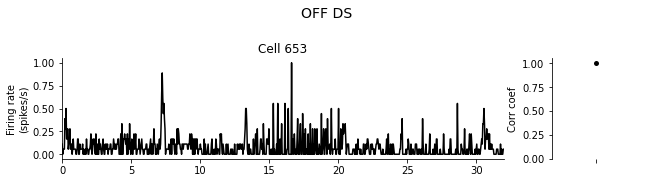

OFF step : [365 679 743]
[0.81364088 0.92084828]
[0.81364088 0.80318038]
[0.92084828 0.80318038]


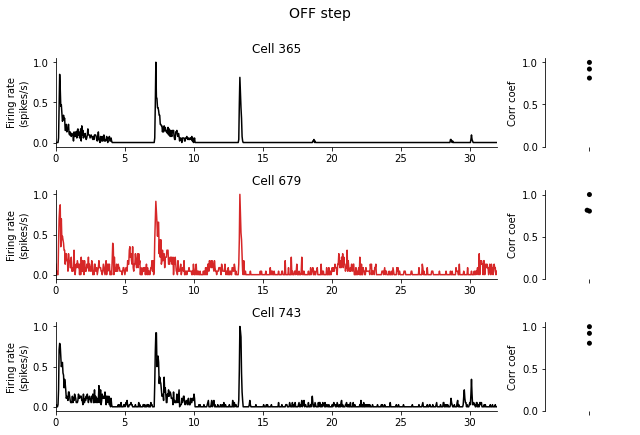

OFF alpha sustained : [ 19  39 145 295 405 562 570 627 807]
[0.9619087  0.75283574 0.9315704  0.92513954 0.95277058 0.93873929
 0.94790379 0.94754769]
[0.9619087  0.75794253 0.96183588 0.89687041 0.96003392 0.92420241
 0.9402931  0.94236094]
[0.75283574 0.75794253 0.72767215 0.74515784 0.74189237 0.73131394
 0.74968173 0.74870548]
[0.9315704  0.96183588 0.72767215 0.86974389 0.96575353 0.9141952
 0.90978181 0.91034611]
[0.92513954 0.89687041 0.74515784 0.86974389 0.89828894 0.92204709
 0.88878244 0.88514462]
[0.95277058 0.96003392 0.74189237 0.96575353 0.89828894 0.93785154
 0.92665383 0.92092587]
[0.93873929 0.92420241 0.73131394 0.9141952  0.92204709 0.93785154
 0.91396414 0.89409341]
[0.94790379 0.9402931  0.74968173 0.90978181 0.88878244 0.92665383
 0.91396414 0.94424039]
[0.94754769 0.94236094 0.74870548 0.91034611 0.88514462 0.92092587
 0.89409341 0.94424039]


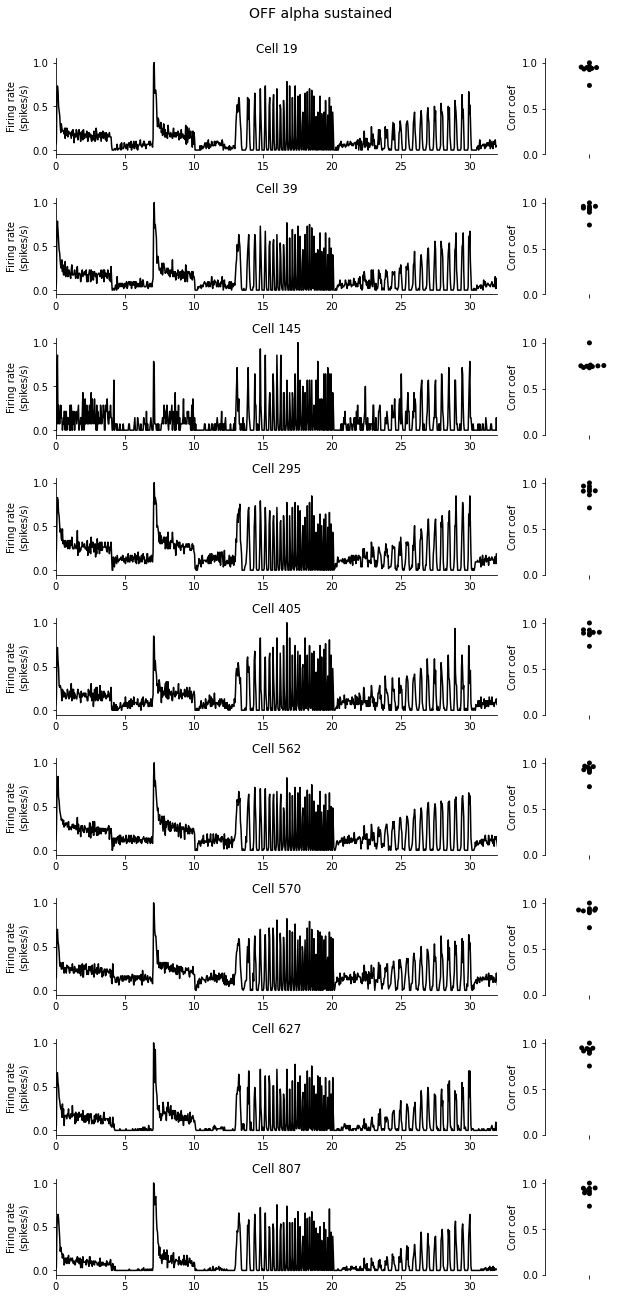

OFF alpha transient : [ 79 337 387 461 781]
[0.66551221 0.98540084 0.86510351 0.5999283 ]
[0.66551221 0.67689932 0.64540624 0.55765392]
[0.98540084 0.67689932 0.8497748  0.61421279]
[0.86510351 0.64540624 0.8497748  0.52117809]
[0.5999283  0.55765392 0.61421279 0.52117809]


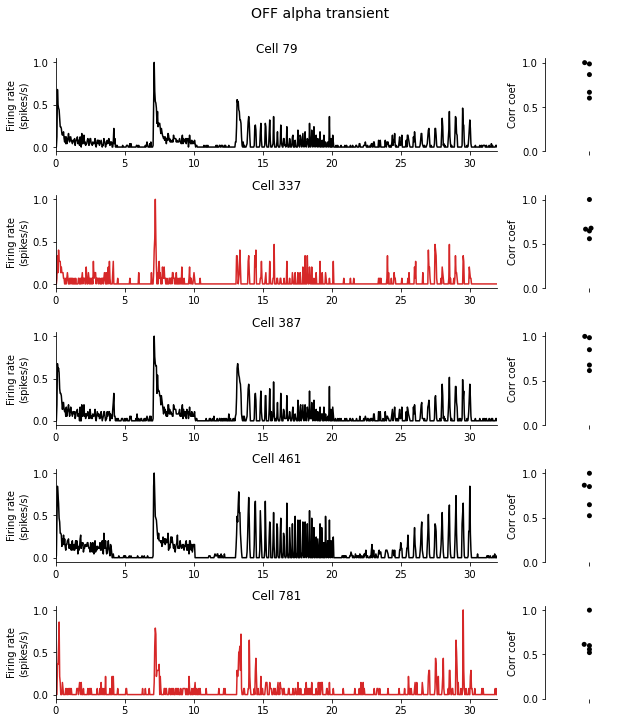

ON-OFF local OS : [563]
[]


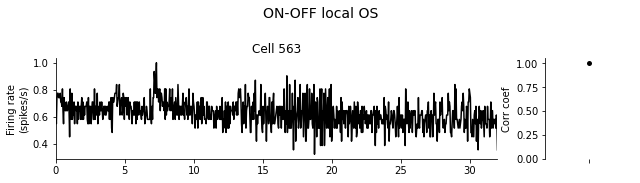

ON step : [ 52  55  66  84 105 109 173 180 201 294 310 811]
[0.83767004 0.62444051 0.93381747 0.89702831 0.79501433 0.94961512
 0.87104141 0.63765513 0.5997244  0.8884608  0.75631267]
[0.83767004 0.37941198 0.8278472  0.73687978 0.84257344 0.86602053
 0.82251705 0.61453355 0.37056788 0.85788703 0.71439956]
[0.62444051 0.37941198 0.61301487 0.57643073 0.44908056 0.57257909
 0.49117542 0.45979291 0.63200099 0.58065875 0.53403211]
[0.93381747 0.8278472  0.61301487 0.8880307  0.74015769 0.9364277
 0.8549868  0.58101742 0.65243236 0.873303   0.68792255]
[0.89702831 0.73687978 0.57643073 0.8880307  0.66609954 0.92147536
 0.85249551 0.56645698 0.51030172 0.76339014 0.68325938]
[0.79501433 0.84257344 0.44908056 0.74015769 0.66609954 0.7923475
 0.74037844 0.66393262 0.3952799  0.81041636 0.74243079]
[0.94961512 0.86602053 0.57257909 0.9364277  0.92147536 0.7923475
 0.89308243 0.63885636 0.56665835 0.86520801 0.78215777]
[0.87104141 0.82251705 0.49117542 0.8549868  0.85249551 0.74037844
 0.89308

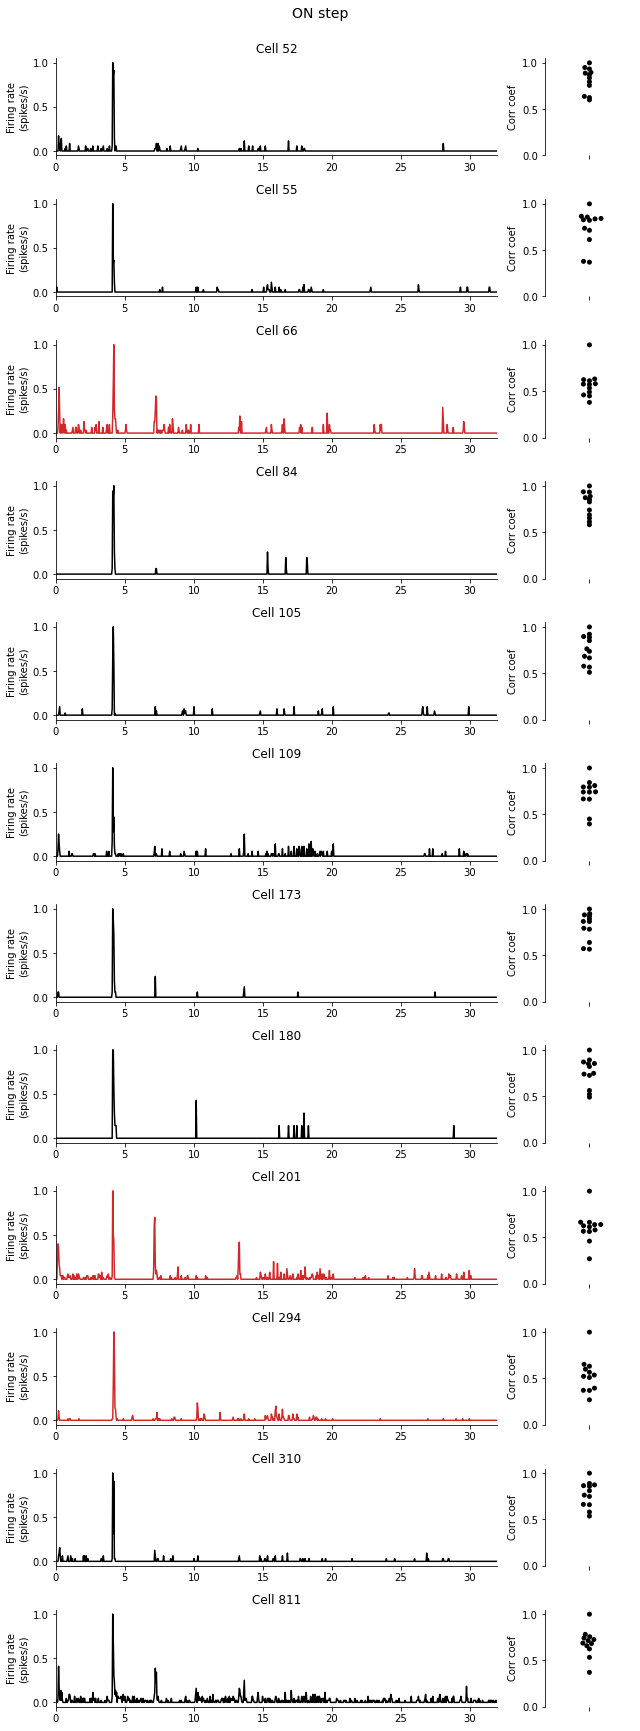

ON local transient OS : [339 611]
[0.58740059]
[0.58740059]


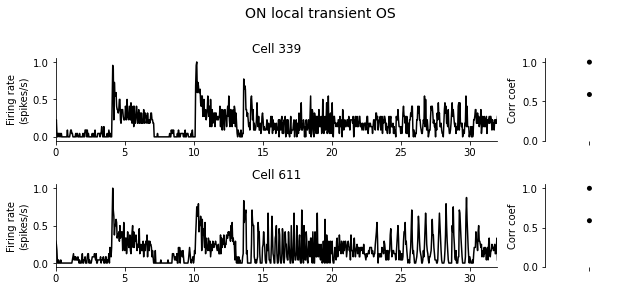

ON high frequency : [333 665]
[0.74795264]
[0.74795264]


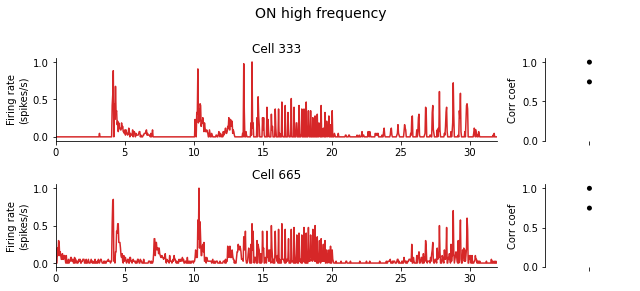

ON mini alpha : [ 67  98 207 485 680 771]
[0.85958161 0.92267816 0.83558455 0.87793697 0.76298604]
[0.85958161 0.88462132 0.94005678 0.95759394 0.7035495 ]
[0.92267816 0.88462132 0.86337986 0.90836969 0.72672511]
[0.83558455 0.94005678 0.86337986 0.92915763 0.67403435]
[0.87793697 0.95759394 0.90836969 0.92915763 0.7333594 ]
[0.76298604 0.7035495  0.72672511 0.67403435 0.7333594 ]


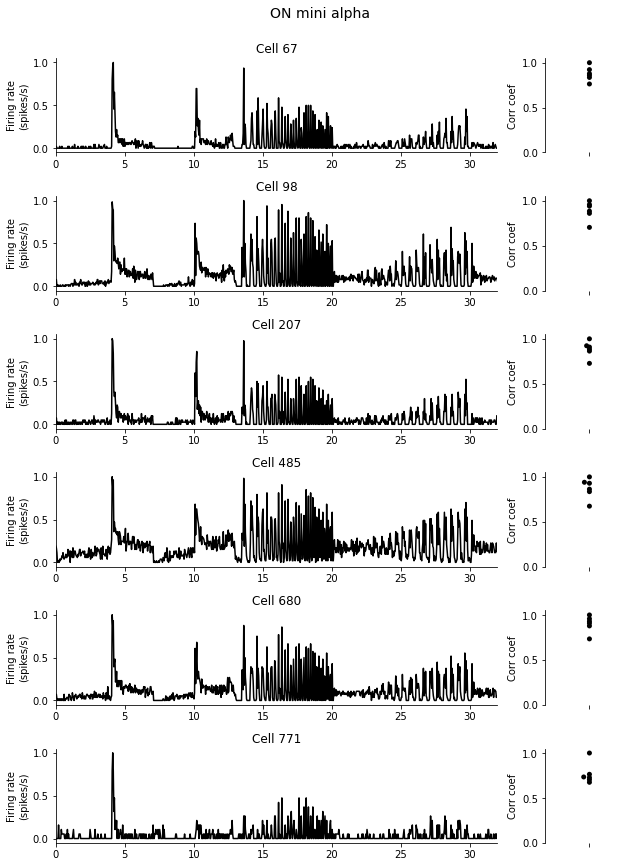

ON alpha : [375 506 523 583 601 733]
[0.92117849 0.92534618 0.9453884  0.92409129 0.92885576]
[0.92117849 0.89561228 0.88850966 0.93330909 0.93392246]
[0.92534618 0.89561228 0.92710628 0.93346526 0.89447356]
[0.9453884  0.88850966 0.92710628 0.91126383 0.91271769]
[0.92409129 0.93330909 0.93346526 0.91126383 0.91352896]
[0.92885576 0.93392246 0.89447356 0.91271769 0.91352896]


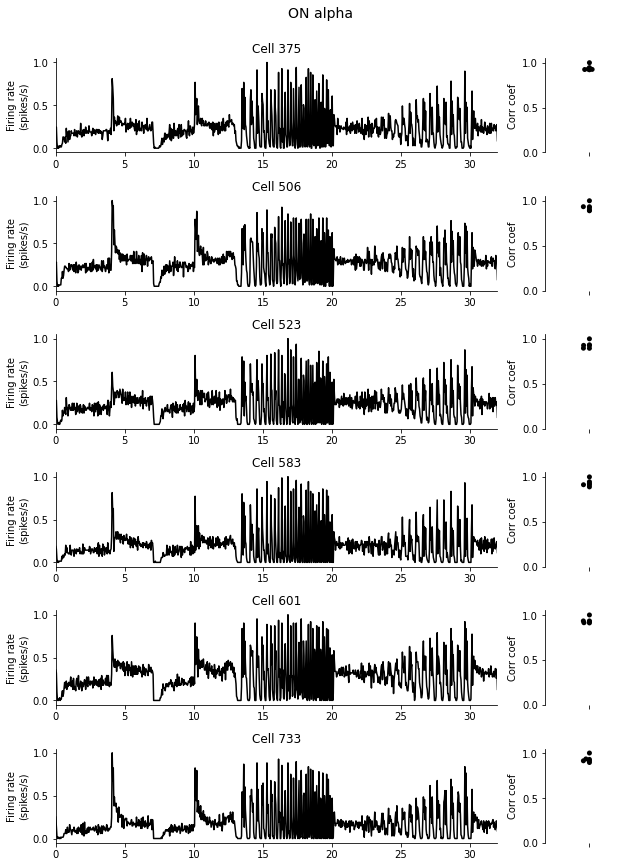

ON DS sustained 2 : [232]
[]


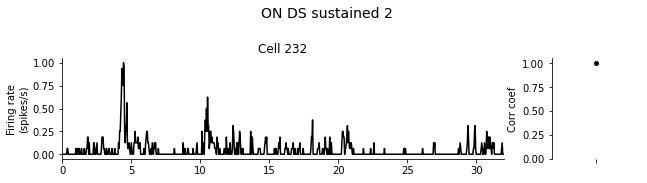

ON slow : [ 30 113 182 531 775]
[0.63881869 0.58798014 0.7895562  0.57448425]
[0.63881869 0.54911173 0.60997257 0.51704593]
[0.58798014 0.54911173 0.54077091 0.49338827]
[0.7895562  0.60997257 0.54077091 0.64343868]
[0.57448425 0.51704593 0.49338827 0.64343868]


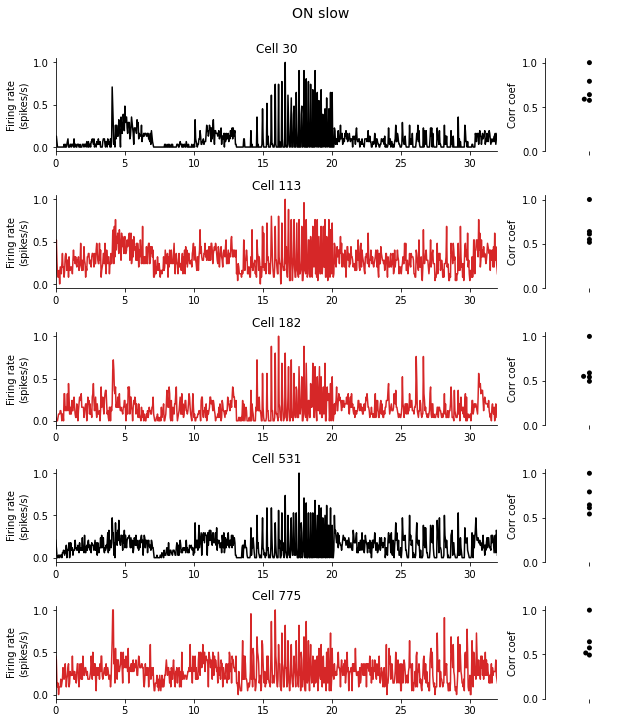

ON constrast suppression : [ 27 205]
[0.83360596]
[0.83360596]


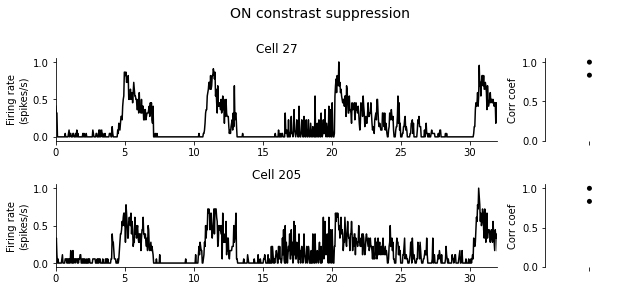

OFF suppression 1 : [323]
[]


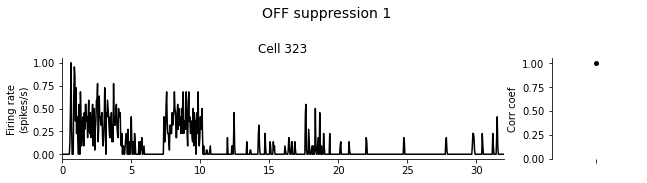

In [31]:
cell_types_cleaned = np.copy(cell_types)

baseline_len = 4 # sec
dt = 0.04 # sec
baseline_end = int(baseline_len / dt)

for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(9, 2.5))
        else:
            fig = plt.figure(figsize=(9, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 2, width_ratios = [5,1])

        cross_corrs = np.zeros((len(selected_cells), len(selected_cells)))
        
        removed_cells = []

        for i, cell_nb in enumerate(selected_cells):
            cell_index = where(cells_clustering == cell_nb)[0][0]
            
            psth = cell_data[str(cell_nb)]['psth']

            # Normalization
            psth = psth/max(psth)

            # Cross corr
            for j, cell_nb2 in enumerate(selected_cells):
                psth2 = cell_data[str(cell_nb2)]['psth']
                # Normalization
                psth2 = psth2/max(psth2)

                cross_corrs[i,j] = np.corrcoef(psth, psth2)[0,1]
            
            # Remove that cell ?
            print (np.delete(cross_corrs[i], i))
            
            ax = fig.add_subplot(GS[i,0])
            
            if euler_label_names[iLabel] == 'OFF step':
                threshold = 0.85
            elif euler_label_names[iLabel] == 'ON local transient OS':
                threshold = 0.50
            else:
                threshold = 0.75
            
            if len(selected_cells) > 1 and all(delete(cross_corrs[i], i) < threshold):
                ax.plot(np.linspace(0,32,800), psth, 'C3')
                removed_cells.append(cell_index)
                cell_types_cleaned[cell_index] = nan
            else:
                ax.plot(np.linspace(0,32,800), psth, 'k')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
                
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
                
            ax = fig.add_subplot(GS[i,1])
            sns.swarmplot(y=cross_corrs[i], color='k')
            ax.set_ylim(0,1.05)
            ax.set_ylabel('Corr coef')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
        
        plt.tight_layout()

        plt.show()

In [32]:
cell_types_cleaned

array([ 4., 27., 26.,  4., 14., 14., nan, 22.,  7., 14., 22., 14., 14.,
       nan,  4., 14., 14., nan, nan, 27., 22., 25., nan,  4., 14., 30.,
       nan, nan, 16.,  2., 23.,  7.,  4.,  7., 22., 23., 23., 26.,  4.,
       13.,  4., 23., 23., 16.,  4.,  1., nan, nan, 22., 23.,  2., 22.,
       nan, nan,  4., 14.])

In [33]:
cell_types

array([ 4., 27., 26.,  4., 14., 14., 14., 22.,  7., 14., 22., 14., 14.,
       26.,  4., 14., 14., 26., 14., 27., 22., 25., 14.,  4., 14., 30.,
       19.,  7., 16.,  2., 23.,  7.,  4.,  7., 22., 23., 23., 26.,  4.,
       13.,  4., 23., 23., 16.,  4.,  1., 19.,  2., 22., 23.,  2., 22.,
       26.,  7.,  4., 14.])

## Plot new types

OFF DS : [653]


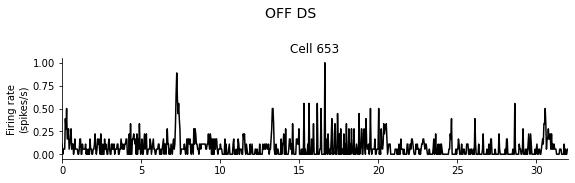

OFF step : [365 743]


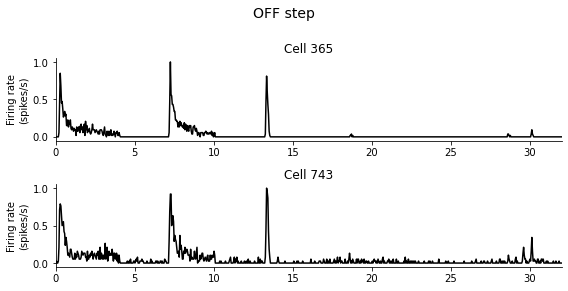

OFF alpha sustained : [ 19  39 145 295 405 562 570 627 807]


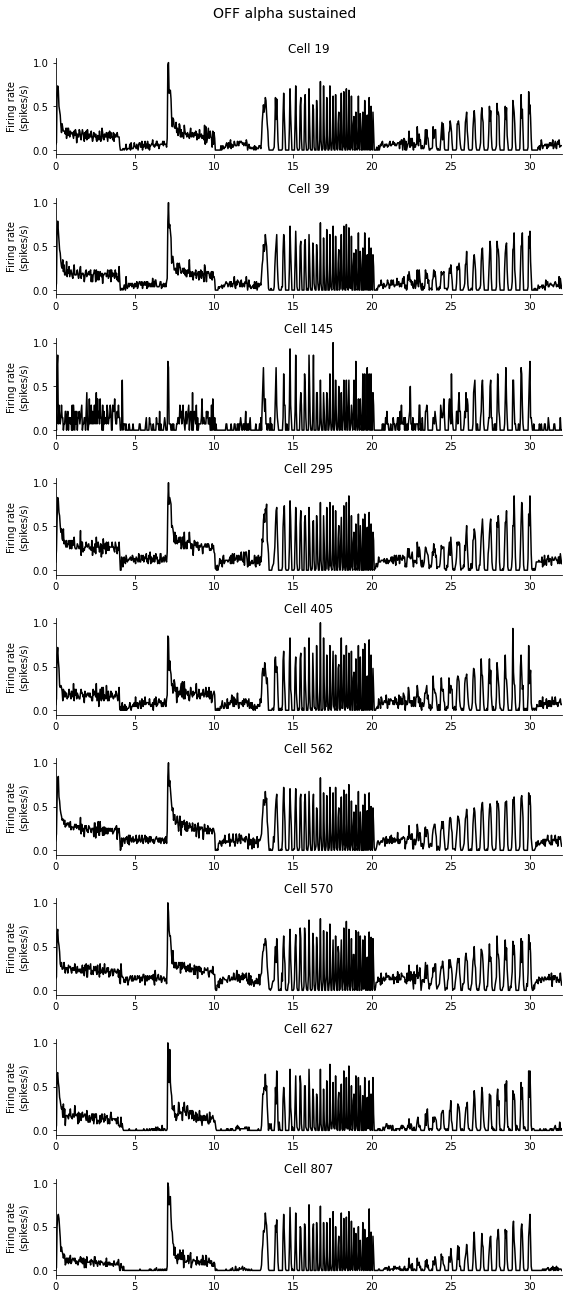

OFF alpha transient : [ 79 387 461]


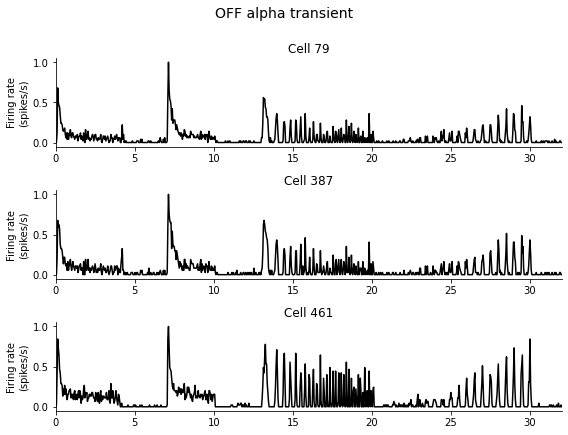

ON-OFF local OS : [563]


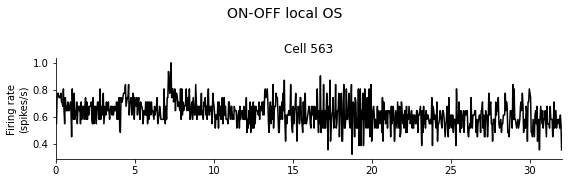

ON step : [ 52  55  84 105 109 173 180 310 811]


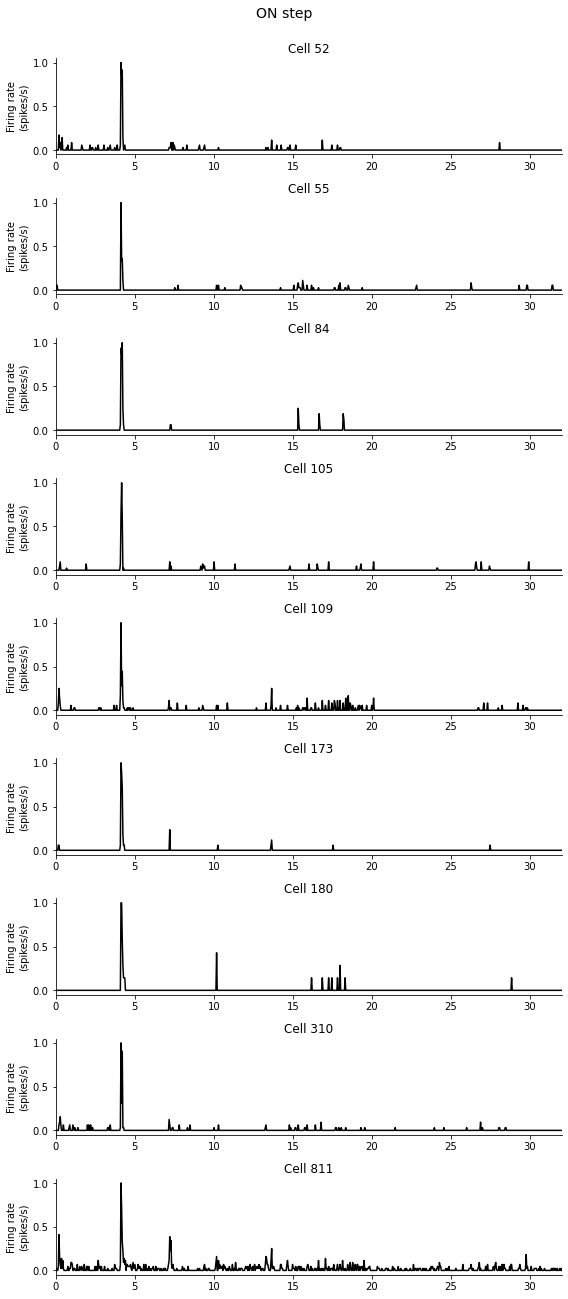

ON local transient OS : [339 611]


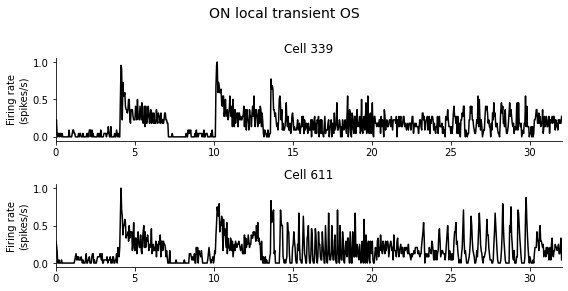

ON mini alpha : [ 67  98 207 485 680 771]


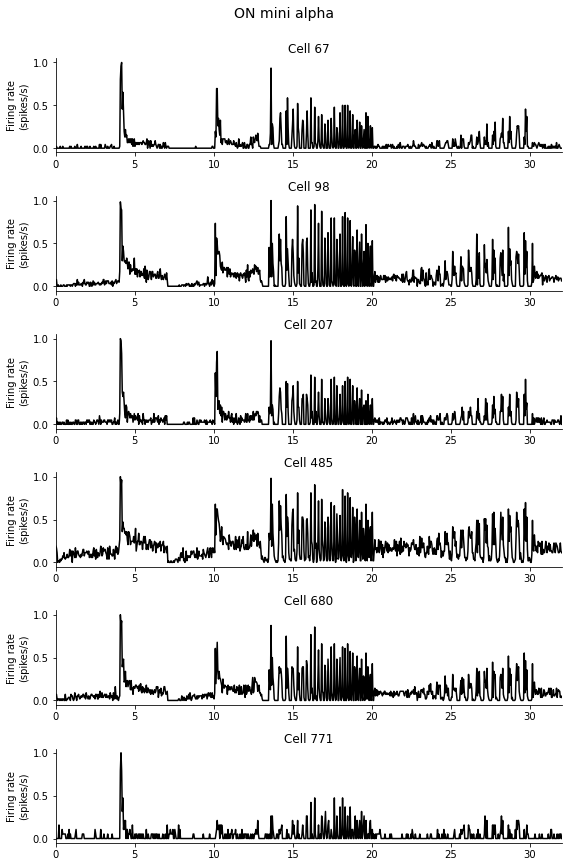

ON alpha : [375 506 523 583 601 733]


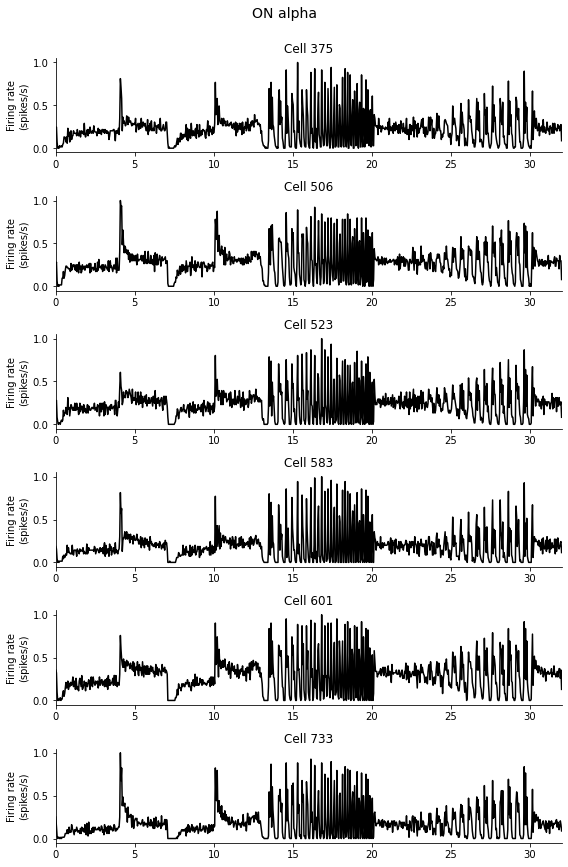

ON DS sustained 2 : [232]


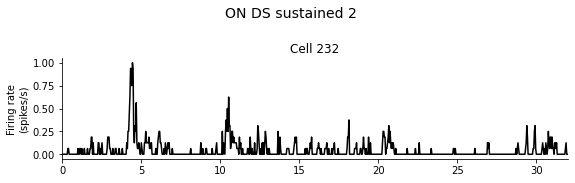

ON slow : [ 30 531]


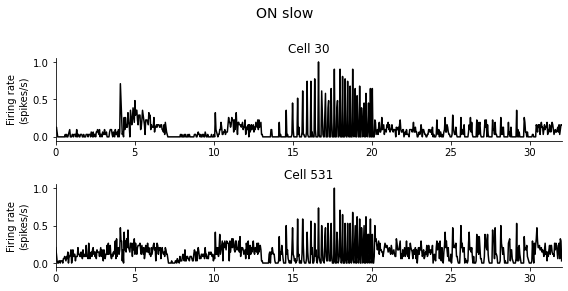

ON constrast suppression : [ 27 205]


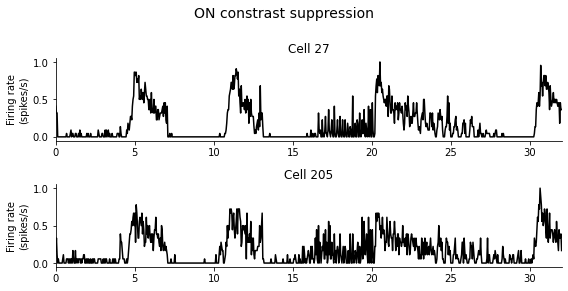

OFF suppression 1 : [323]


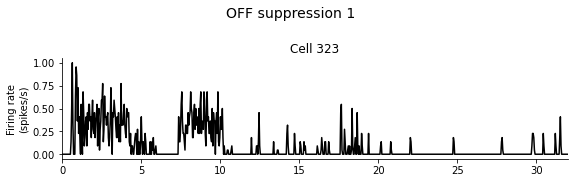

In [34]:
for iLabel in range(len(euler_labels)):
    cell_type = euler_labels[iLabel][0]
    selected_cells = cells_clustering[cell_types_cleaned == iLabel]
    
    if len(selected_cells) > 0:
        print (cell_type, ':', selected_cells)

        if len(selected_cells) == 1:
            fig = plt.figure(figsize=(8, 2.5))
        else:
            fig = plt.figure(figsize=(8, len(selected_cells) * 2))
        fig.suptitle(euler_label_names[iLabel], fontsize=14, y=1)
        GS = fig.add_gridspec(len(selected_cells), 1)

        for i, cell_nb in enumerate(selected_cells):

            psth = cell_data[str(cell_nb)]['psth']
            
            ax = fig.add_subplot(GS[i])
            ax.plot(np.linspace(0,32,800), psth/amax(psth), 'k')
            if i == len(selected_cells):
                ax.set_xlabel("Time (s)")
            ax.set_ylabel("Firing rate\n(spikes/s)")
            ax.set_title('Cell {}'.format(cell_nb))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_xlim(0, 32)
        
        plt.tight_layout()
        plt.show()

In [35]:
# Save cleaned Baden type for each cell in 'selected_cells'
fsave = exp_path + str(exp) + '_celltype_Baden_cleaned'
save_obj(cell_types_cleaned,fsave)

# fsave = exp_path + str(exp) + '_types_cleaned'
# save_obj(euler_labels_cleaning,fsave)

In [ ]:
euler